In [124]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error

In [125]:
# loading Data

data=pd.read_csv("HRD.csv")

data.rename(columns={'satisfaction_level': 'Satisfaction Level'}, inplace=True)
data.rename(columns={'number_project': 'Number of Project'}, inplace=True)
data.rename(columns={'average_montly_hours': 'Working Hours/Month'}, inplace=True)
data.rename(columns={'time_spend_company': 'Working Years'}, inplace=True)
data.rename(columns={'Work_accident': 'Work Accident'}, inplace=True)
data.rename(columns={'left': 'Leave (Yes/No)'}, inplace=True)
data.rename(columns={'promotion_last_5years': 'Number of Promotion'}, inplace=True)
data.rename(columns={'sales': 'Department'}, inplace=True)
data.rename(columns={'salary': 'Salary Level'}, inplace=True)

data = data.drop('last_evaluation',axis = 1)

data.head()

,Satisfaction Level,Number of Project,Working Hours/Month,Working Years,Work Accident,Leave (Yes/No),Number of Promotion,Department,Salary Level
0,0.38,2,157,3,0,1,0,sales,low
1,0.80,5,262,6,0,1,0,sales,medium
2,0.11,7,272,4,0,1,0,sales,medium
3,0.72,5,223,5,0,1,0,sales,low
4,0.37,2,159,3,0,1,0,sales,low


In [126]:
data.describe()

,Satisfaction Level,Number of Project,Working Hours/Month,Working Years,Work Accident,Leave (Yes/No),Number of Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

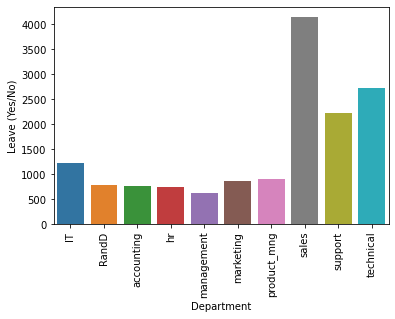

In [127]:
data_group = data.groupby(by=['Department'],as_index=False).count()
ax = sns.barplot(x="Department", y="Leave (Yes/No)", data=data_group)
plt.xticks(rotation = 90)

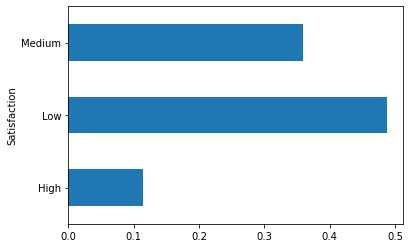

In [128]:
def Satisfaction(row):
    if row['Satisfaction Level']<= .3 :
        return 'Low'
    elif row['Satisfaction Level'] >= .6:
        return 'High'
    else:
        return 'Medium'

data['Satisfaction'] = data.apply(Satisfaction, axis=1)

data.head()

data_group = data.groupby(by=['Satisfaction'])
rate = data_group['Leave (Yes/No)'].sum() / data_group['Leave (Yes/No)'].count()
plot1 =rate.plot(kind='barh')

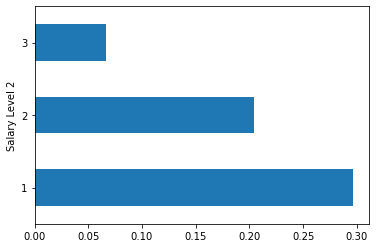

In [129]:
def SalaryLevel2(row):
    if row['Salary Level']=='high':
        return 3
    elif row['Salary Level'] == 'medium':
        return 2
    else:
        return 1
    
data['Salary Level 2'] = data.apply(SalaryLevel2, axis=1)

data.head()

data_group = data.groupby(by=['Salary Level 2'])
rate = data_group['Leave (Yes/No)'].sum() / data_group['Leave (Yes/No)'].count()
plot1 =rate.plot(kind='barh')

In [130]:
data.head()

,Satisfaction Level,Number of Project,Working Hours/Month,Working Years,Work Accident,Leave (Yes/No),Number of Promotion,Department,Salary Level,Satisfaction,Salary Level 2
0,0.38,2,157,3,0,1,0,sales,low,Medium,1
1,0.80,5,262,6,0,1,0,sales,medium,High,2
2,0.11,7,272,4,0,1,0,sales,medium,Low,2
3,0.72,5,223,5,0,1,0,sales,low,High,1
4,0.37,2,159,3,0,1,0,sales,low,Medium,1


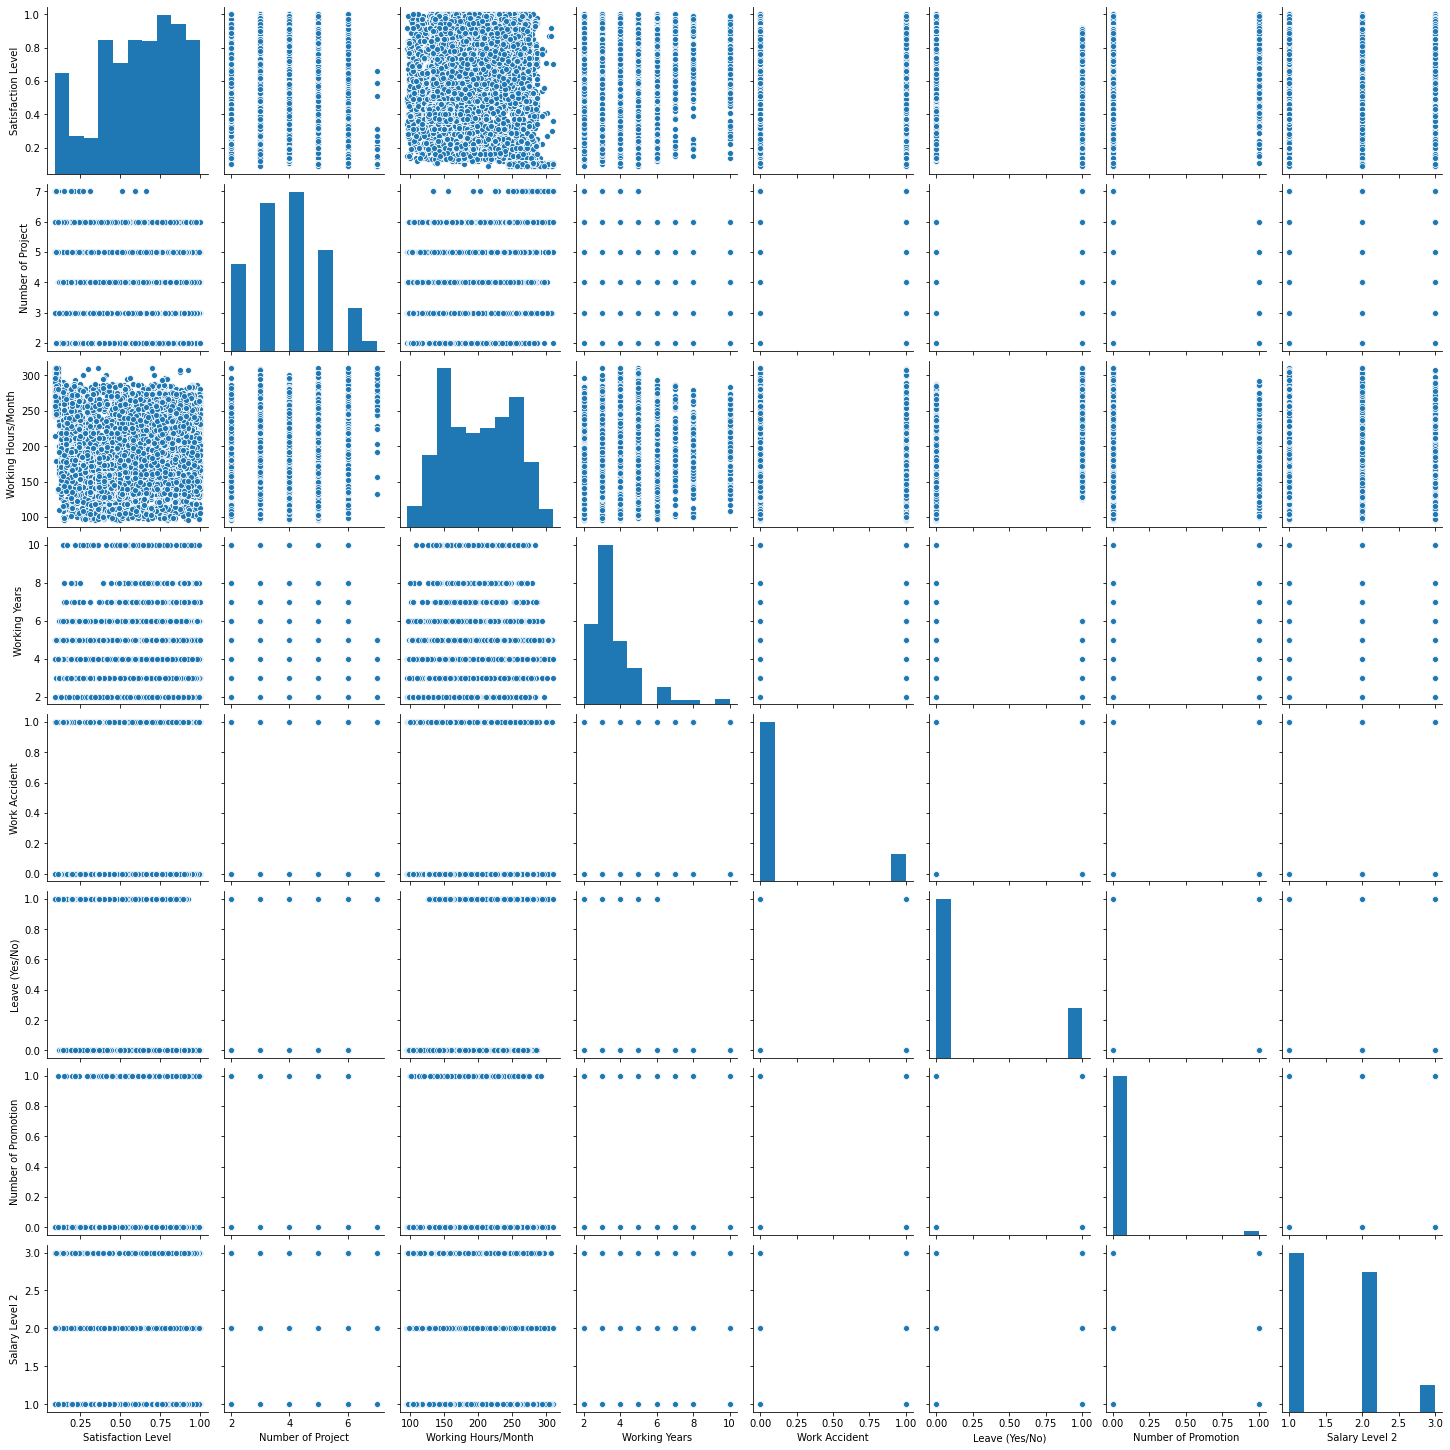

In [131]:
sns.pairplot(data)

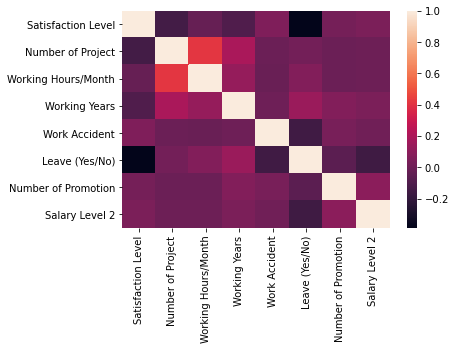

In [132]:
# Correlation plot
corr = data.corr()
sns.heatmap(corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values)

In [133]:
data = data.drop('Satisfaction',axis = 1)
data = data.drop('Salary Level',axis = 1)
data = data.drop('Department',axis = 1)

data.head()

,Satisfaction Level,Number of Project,Working Hours/Month,Working Years,Work Accident,Leave (Yes/No),Number of Promotion,Salary Level 2
0,0.38,2,157,3,0,1,0,1
1,0.80,5,262,6,0,1,0,2
2,0.11,7,272,4,0,1,0,2
3,0.72,5,223,5,0,1,0,1
4,0.37,2,159,3,0,1,0,1


In [134]:
# Split train and test data
X = data.drop('Leave (Yes/No)',axis = 1)
y = data['Leave (Yes/No)']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 200)

In [135]:
# Model Evaluation
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(X_train,y_train)
print('Mean absolute error for RF model: %0.4f'
%mean_absolute_error(y_val,rf_model.predict(X_val)))

Mean absolute error for RF model: 0.0285


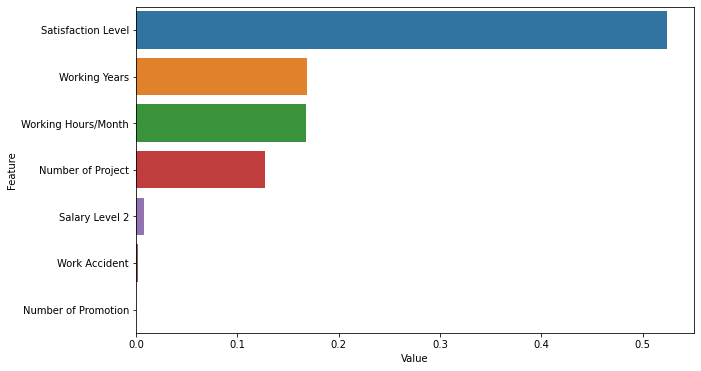

In [136]:
# Important Factors
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)),
columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",ascending=False))